In [101]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, norm

Для работы с данными объединим 3 фрагмента датасета: train, test и gender_submition.

In [114]:
path_train = '/home/kupaeva/Документы/titanic/train.csv'

In [115]:
data_full = pd.read_csv(path_train)

In [116]:
path_test = '/home/kupaeva/Документы/titanic/test.csv'

In [117]:
data_test = pd.read_csv(path_test)

In [118]:
path_test2 = '/home/kupaeva/Документы/titanic/gender_submission.csv'

In [119]:
data_test2 = pd.read_csv(path_test2)

In [120]:
data_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [121]:
data_test2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


В датафрейме data_test нет колонки Survived, поскольку данные предлагаются для машинного обучения и предсказанию значения этого параметра. 
Сделаем колонку, заполненную NA:

In [122]:
data_test['Survived'] = np.NaN

Объединим 2 датасета, и заполним созданные NA данными из датасета data_test2:

In [123]:
data_full = data_full.append(data_test)

In [124]:
data_full = data_full.combine_first(data_test2)

Посмотрим на полный датасет:

In [125]:
data_full

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1.0,3,male,1,0.0,A/5 21171
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892.0,3,male,0,0.0,330911
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,female,1,1.0,PC 17599
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893.0,3,female,1,1.0,363272
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3.0,3,female,0,1.0,STON/O2. 3101282
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887.0,2,male,0,0.0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888.0,1,female,0,1.0,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889.0,3,female,1,0.0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890.0,1,male,0,1.0,111369


In [107]:
data_full.dtypes

Age             float64
Cabin            object
Embarked         object
Fare            float64
Name             object
Parch             int64
PassengerId     float64
Pclass            int64
Sex               int64
SibSp             int64
Survived       category
Ticket           object
dtype: object

Как мы видим, все данные являются числовыми данными или строками. Однако несколько из них по сути представляют собой категориальные переменные: Sex, Pclass и Survived. Переведем их в категориальный тип:

In [126]:
data_full['Sex'] = data_full['Sex'].astype('category')
data_full['Sex'] = data_full['Sex'].cat.as_ordered()

In [127]:
data_full['Survived'] = data_full['Survived'].astype('category')
data_full['Survived'] = data_full['Survived'].cat.as_ordered()

In [128]:
data_full['Pclass'] = data_full['Pclass'].astype('category')
data_full['Pclass'] = data_full['Pclass'].cat.as_ordered()

In [107]:
data_full.dtypes

Age             float64
Cabin            object
Embarked         object
Fare            float64
Name             object
Parch             int64
PassengerId     float64
Pclass            int64
Sex               int64
SibSp             int64
Survived       category
Ticket           object
dtype: object

Проверим содержание NA:

In [129]:
data_full.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [136]:
data_full = data_full.drop('Cabin', 1)

In [137]:
data_full_notna = data_full.dropna()

In [139]:
data_full.isna().sum()

Age            263
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

Посмотрим теперь на наши данные. Describe позволяет познакомиться с основными описательными статистиками для числовых данных. 

In [138]:
data_full.describe()

,Age,Fare,Parch,PassengerId,SibSp
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,0.498854
std,14.413493,51.758668,0.865560,378.020061,1.041658
min,0.170000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,8.000000


Средний возраст - около 30 лет, 38% путешествует с родителями/детьми, 50% путешествует с супругом/супругой. 

Посмотрим на среднее, сгруппировав данные по полу и классу:

In [162]:
data_full.groupby(['Sex','Pclass']).mean()

Age        Fare     Parch  PassengerId     SibSp
Sex Pclass                                                        
0   1       37.037594  109.412385  0.472222   689.652778  0.555556
    2       27.499223   23.234827  0.650943   632.188679  0.500000
    3       22.185329   15.324250  0.731481   628.393519  0.791667
1   1       41.029272   69.888385  0.279330   658.687151  0.340782
    2       30.815380   19.904946  0.192982   695.976608  0.327485
    3       25.962264   12.415462  0.255578   645.888438  0.470588

Средний возраст женщины в первом классе - 37 лет, билет дороже. 47% путешествует с родителями/детьми, 55% с супругом. 
С уменьшением класса средний возраст также снижается, цена за билет тоже, процент женщин, путешествующих с детьми/родителями - возрастает, а с супругом - немного снижается во втором классе и возрастает в 3. 

Посмотрим на количество пассажиров в каждой категории: 

<AxesSubplot:xlabel='Sex,Pclass'>

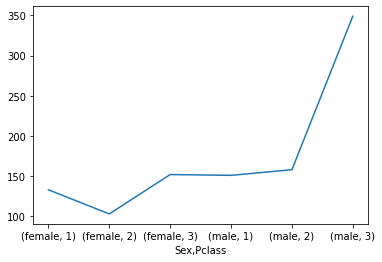

In [153]:
data_full[['Age', 'Sex', 'Pclass']].groupby(['Sex','Pclass']).count().plot(legend=False)

In [166]:
data_full[['PassengerId', 'Sex', 'Pclass', 'Survived']].groupby(['Sex','Pclass','Survived']).count()

PassengerId
Sex Pclass Survived             
0   1      0.0                 3
           1.0               141
    2      0.0                 6
           1.0               100
    3      0.0                72
           1.0               144
1   1      0.0               134
           1.0                45
    2      0.0               154
           1.0                17
    3      0.0               446
           1.0                47

Самая многочисленная категория - это мужчины из 3-го класса. В первом классе число мужчин и женщин совпадает, во втором число женщин незначительно ниже, чем мужчин, а в третем - существенно ниже.

При этом четко видно, что во всех классах женщины чаще выживали, чем погибали, а мужчины - наоборот.  

Посмотрим на возрастное распределение пассажиров: 

In [85]:
age_distr = data_full.groupby('Age').agg({'PassengerId': ['count']})

<AxesSubplot:xlabel='Age'>

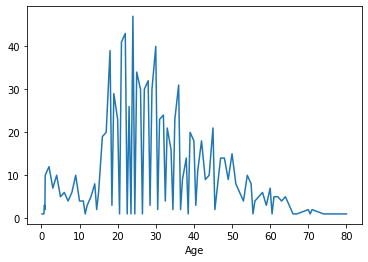

In [156]:
(age_distr.plot(legend=0))

Сгруппировали данные по возрасту и посмтроили график распределения. Как мы видим, большая часть пассажиров - это условно взрослые люди - начиная приблизительно с 15 лет число пассажиров по возрастам резко возрастает, и дальше снижется плавно и равномерно.

<AxesSubplot:>

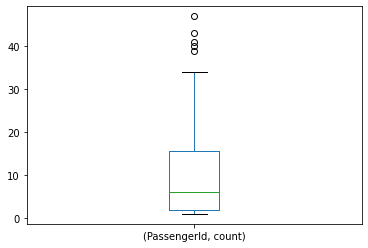

In [86]:
age_distr.plot(kind='box', legend=0)

Соответственно, на боксплоте мы видим похожие результаты: в верхней части плота есть выбромы, и распределение сдвинуто вверх. Проверим нормальность распределения: 

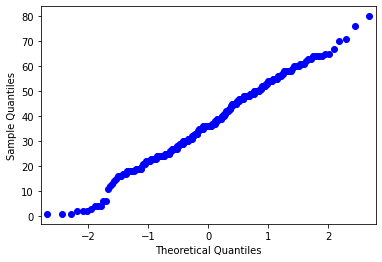

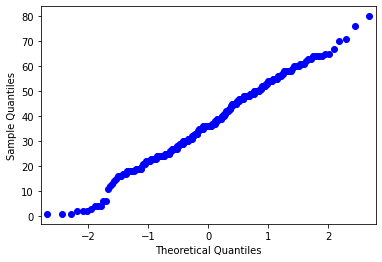

In [132]:
sm.qqplot(data_full_notna.Age)

In [131]:
shapiro(data_full_notna.Age)

ShapiroResult(statistic=0.9913878440856934, pvalue=0.1151111051440239)

QQplot и Шапиро тест не позволяют отвергнуть гипотезу о нормальности распределения. 

Посмотрим на корреляции между переменными. Отобразим выживших цветом. Переведем пол в числовую переменную, чтобы мочь отобразить на графике: 

In [157]:
data_full['Sex'].replace(['female','male'],[0,1],inplace=True)

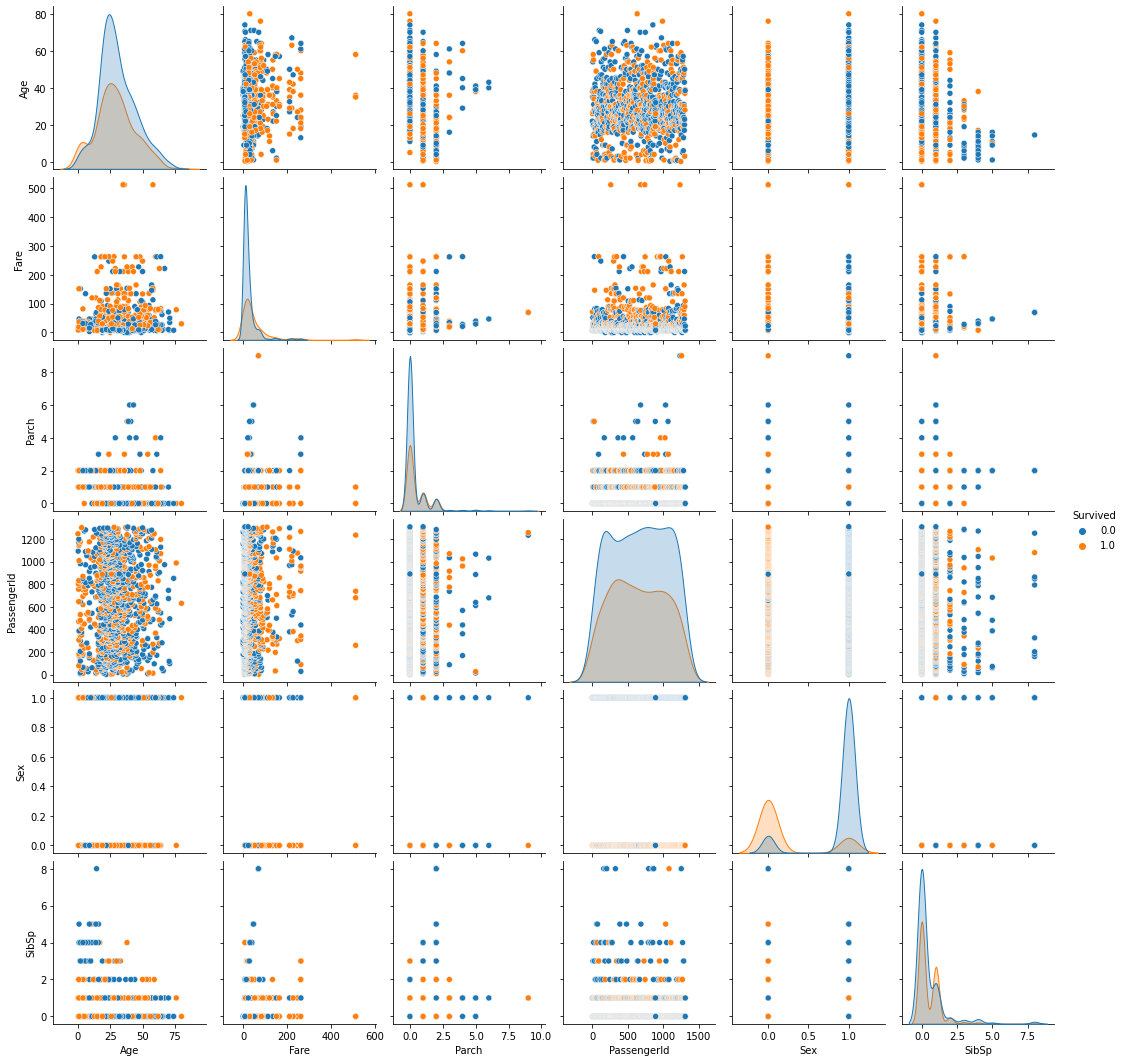

In [158]:
sns.pairplot(data_full, hue='Survived')

На графике есть корреляции между: полом и выживаемостью (женщины выживали чаще, чем мужчины), возрастом и выживаемостью (люди младшего возраста выживали чаще. Более никаких четких корреляций на графике выделить не удается. 

Посчитаем коэффициенты корреляции: 

In [167]:
data_full.Survived.corr(data_full.Sex,  method='spearman')

-0.6883709813303127

In [168]:
data_full.Survived.corr(data_full.Pclass,  method='spearman')

-0.2629774027103344

In [169]:
data_full.Survived.corr(data_full.Age,  method='spearman')

-0.041482629834110434